Dataset Link: https://www.kaggle.com/datasets/amirmotefaker/ab-testing-dataset/data

A/B testing helps in finding a better approach to finding customers, marketing products, getting a higher reach, or anything that helps a business convert most of its target customers into actual customers.

Below are all the features in the dataset:

Campaign Name, Date, Spend, of Impressions, Reach, of Website Clicks: Number of website clicks received through the ads, of Searches, of View Content, of Add to Cart, of Purchases.

Two campaigns were performed by the company: Control Campaign, Test Campaign
Perform A/B testing to find the best campaign for the company to get more customers.

In [43]:
#libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp,shapiro,levene,ttest_ind,mannwhitneyu,pearsonr,spearmanr,kendalltau,f_oneway,kruskal
from statsmodels.stats.proportion import proportions_ztest

In [5]:
#loading data 
control_group = pd.read_csv("D:/stats/data/control_group.csv", sep=";" )
test_group = pd.read_csv("D:/stats/data/test_group.csv", sep=";")

In [6]:
control_group.head(5)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
test_group.head(5)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [8]:
control_group.dtypes

Campaign Name           object
Date                    object
Spend [USD]              int64
# of Impressions       float64
Reach                  float64
# of Website Clicks    float64
# of Searches          float64
# of View Content      float64
# of Add to Cart       float64
# of Purchase          float64
dtype: object

In [10]:
test_group.dtypes

Campaign Name          object
Date                   object
Spend [USD]             int64
# of Impressions        int64
Reach                   int64
# of Website Clicks     int64
# of Searches           int64
# of View Content       int64
# of Add to Cart        int64
# of Purchase           int64
dtype: object

In [11]:
#change the data type of the columns in the test_group from int to float for consistency
test_group["# of Purchase"] = test_group["# of Purchase"].astype(float)
test_group["# of Add to Cart"] = test_group["# of Add to Cart"].astype(float)
test_group["# of View Content"] = test_group["# of View Content"].astype(float)
test_group["# of Searches"] = test_group["# of Searches"].astype(float)
test_group["# of Website Clicks"] = test_group["# of Website Clicks"].astype(float)
test_group["Reach"] = test_group["Reach"].astype(float)
test_group["# of Impressions"] = test_group["# of Impressions"].astype(float)

test_group.dtypes

Campaign Name           object
Date                    object
Spend [USD]              int64
# of Impressions       float64
Reach                  float64
# of Website Clicks    float64
# of Searches          float64
# of View Content      float64
# of Add to Cart       float64
# of Purchase          float64
dtype: object

In [13]:
print(control_group.isnull().sum())
print(test_group.isnull().sum())

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64
Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64


In [16]:
#impute the na values
control_group.iloc[:, 3:] = control_group.iloc[:, 3:].fillna(
    control_group.iloc[:, 3:].median()
)

In [18]:
control_group.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [19]:
#change Date column to datetime
control_group["Date"] = pd.to_datetime(control_group["Date"], dayfirst=True)
test_group["Date"] = pd.to_datetime(test_group["Date"], dayfirst=True)

print(control_group["Date"].head())
print(test_group["Date"].head())

0   2019-08-01
1   2019-08-02
2   2019-08-03
3   2019-08-04
4   2019-08-05
Name: Date, dtype: datetime64[ns]
0   2019-08-01
1   2019-08-02
2   2019-08-03
3   2019-08-04
4   2019-08-05
Name: Date, dtype: datetime64[ns]


In [20]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#replace infinite values with NaN for both control_group and test_group
control_group.replace([np.inf, -np.inf], np.nan, inplace=True)
test_group.replace([np.inf, -np.inf], np.nan, inplace=True)

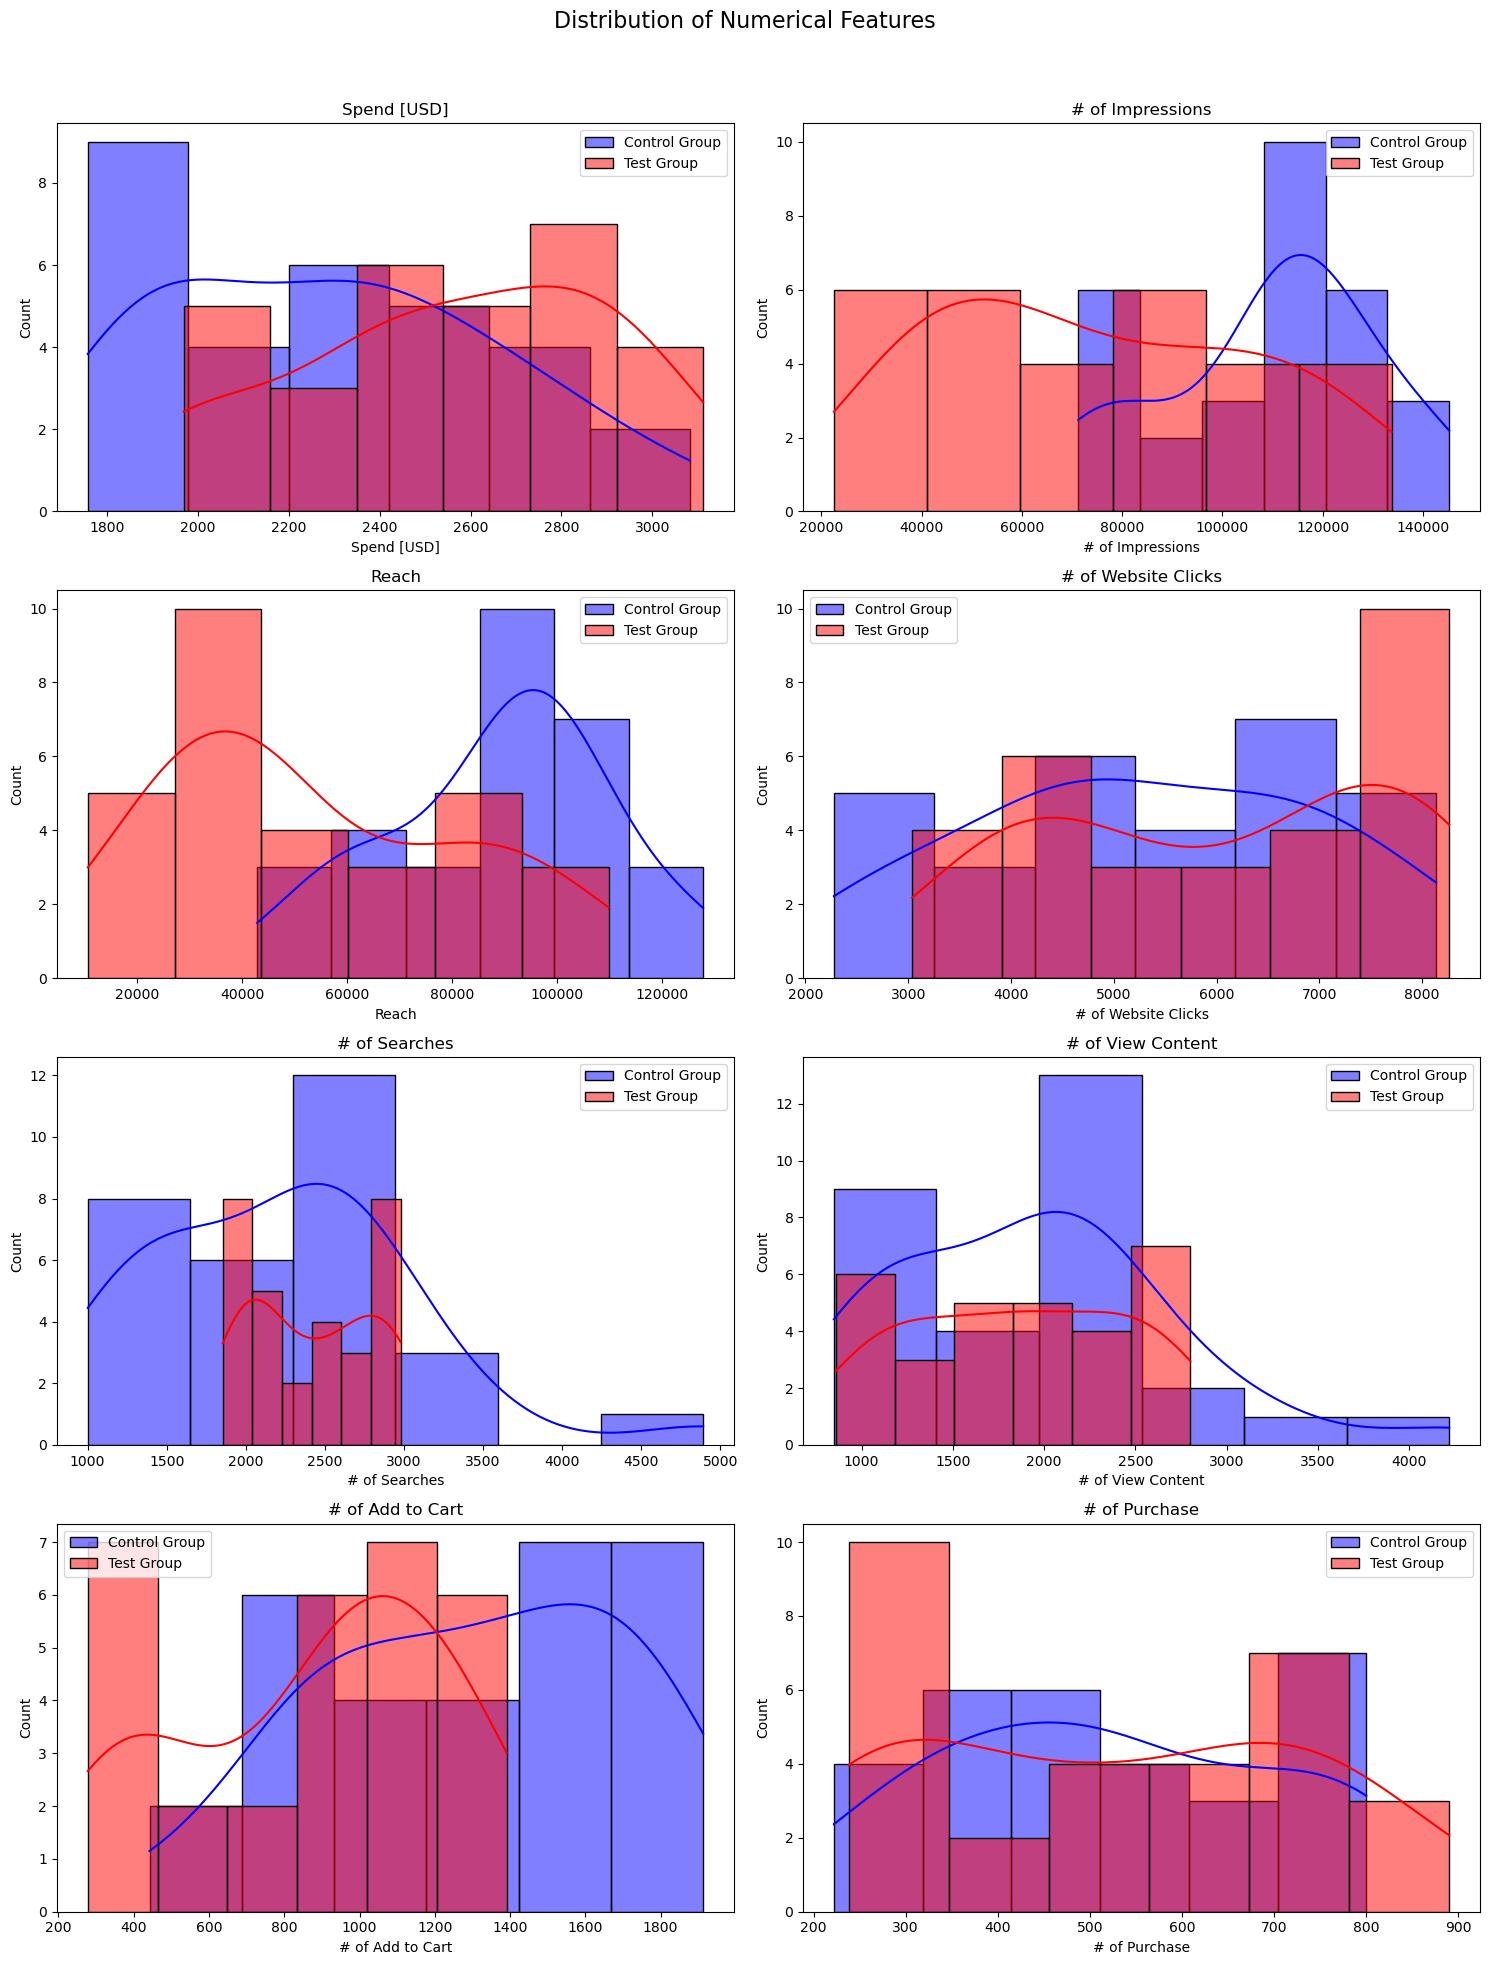

In [32]:
#distribution of Numerical Features
numerical_features = [
    "Spend [USD]",
    "# of Impressions",
    "Reach",
    "# of Website Clicks",
    "# of Searches",
    "# of View Content",
    "# of Add to Cart",
    "# of Purchase",
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle("Distribution of Numerical Features", fontsize=16)


for i, feature in enumerate(numerical_features):
    sns.histplot(
        control_group[feature],
        kde=True,
        ax=axes[i // 2, i % 2],
        color="blue",
        label="Control Group",
    )
    sns.histplot(
        test_group[feature],
        kde=True,
        ax=axes[i // 2, i % 2],
        color="red",
        label="Test Group",
    )
    axes[i // 2, i % 2].set_title(feature)
    axes[i // 2, i % 2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

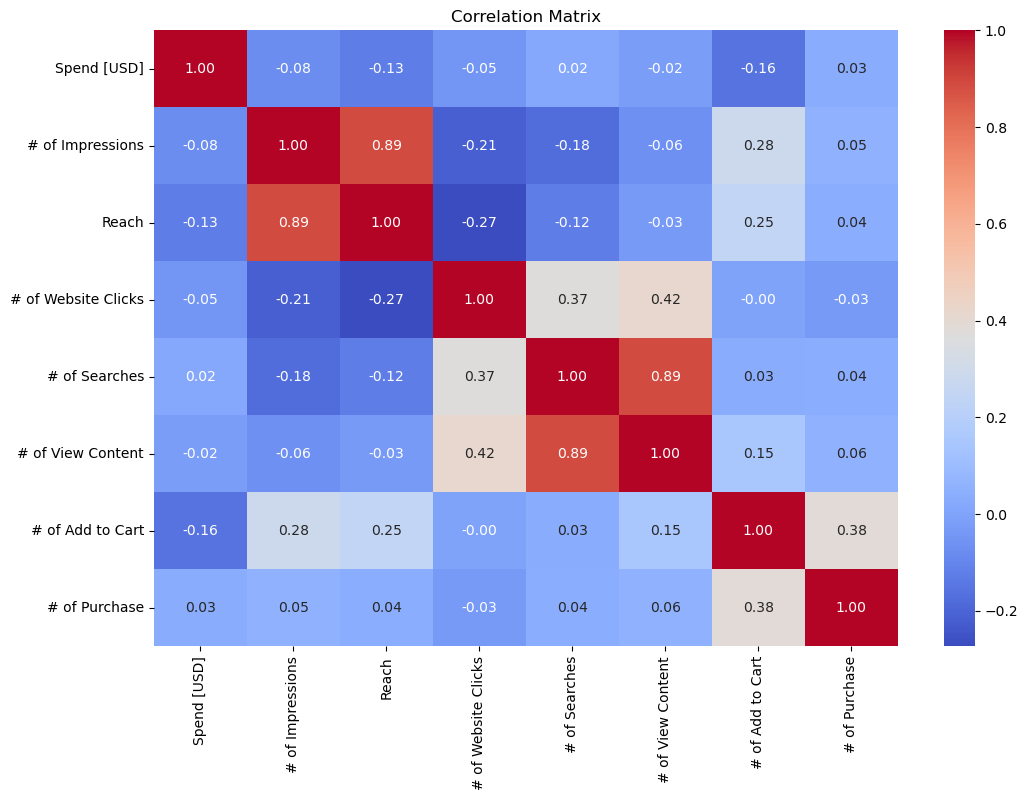

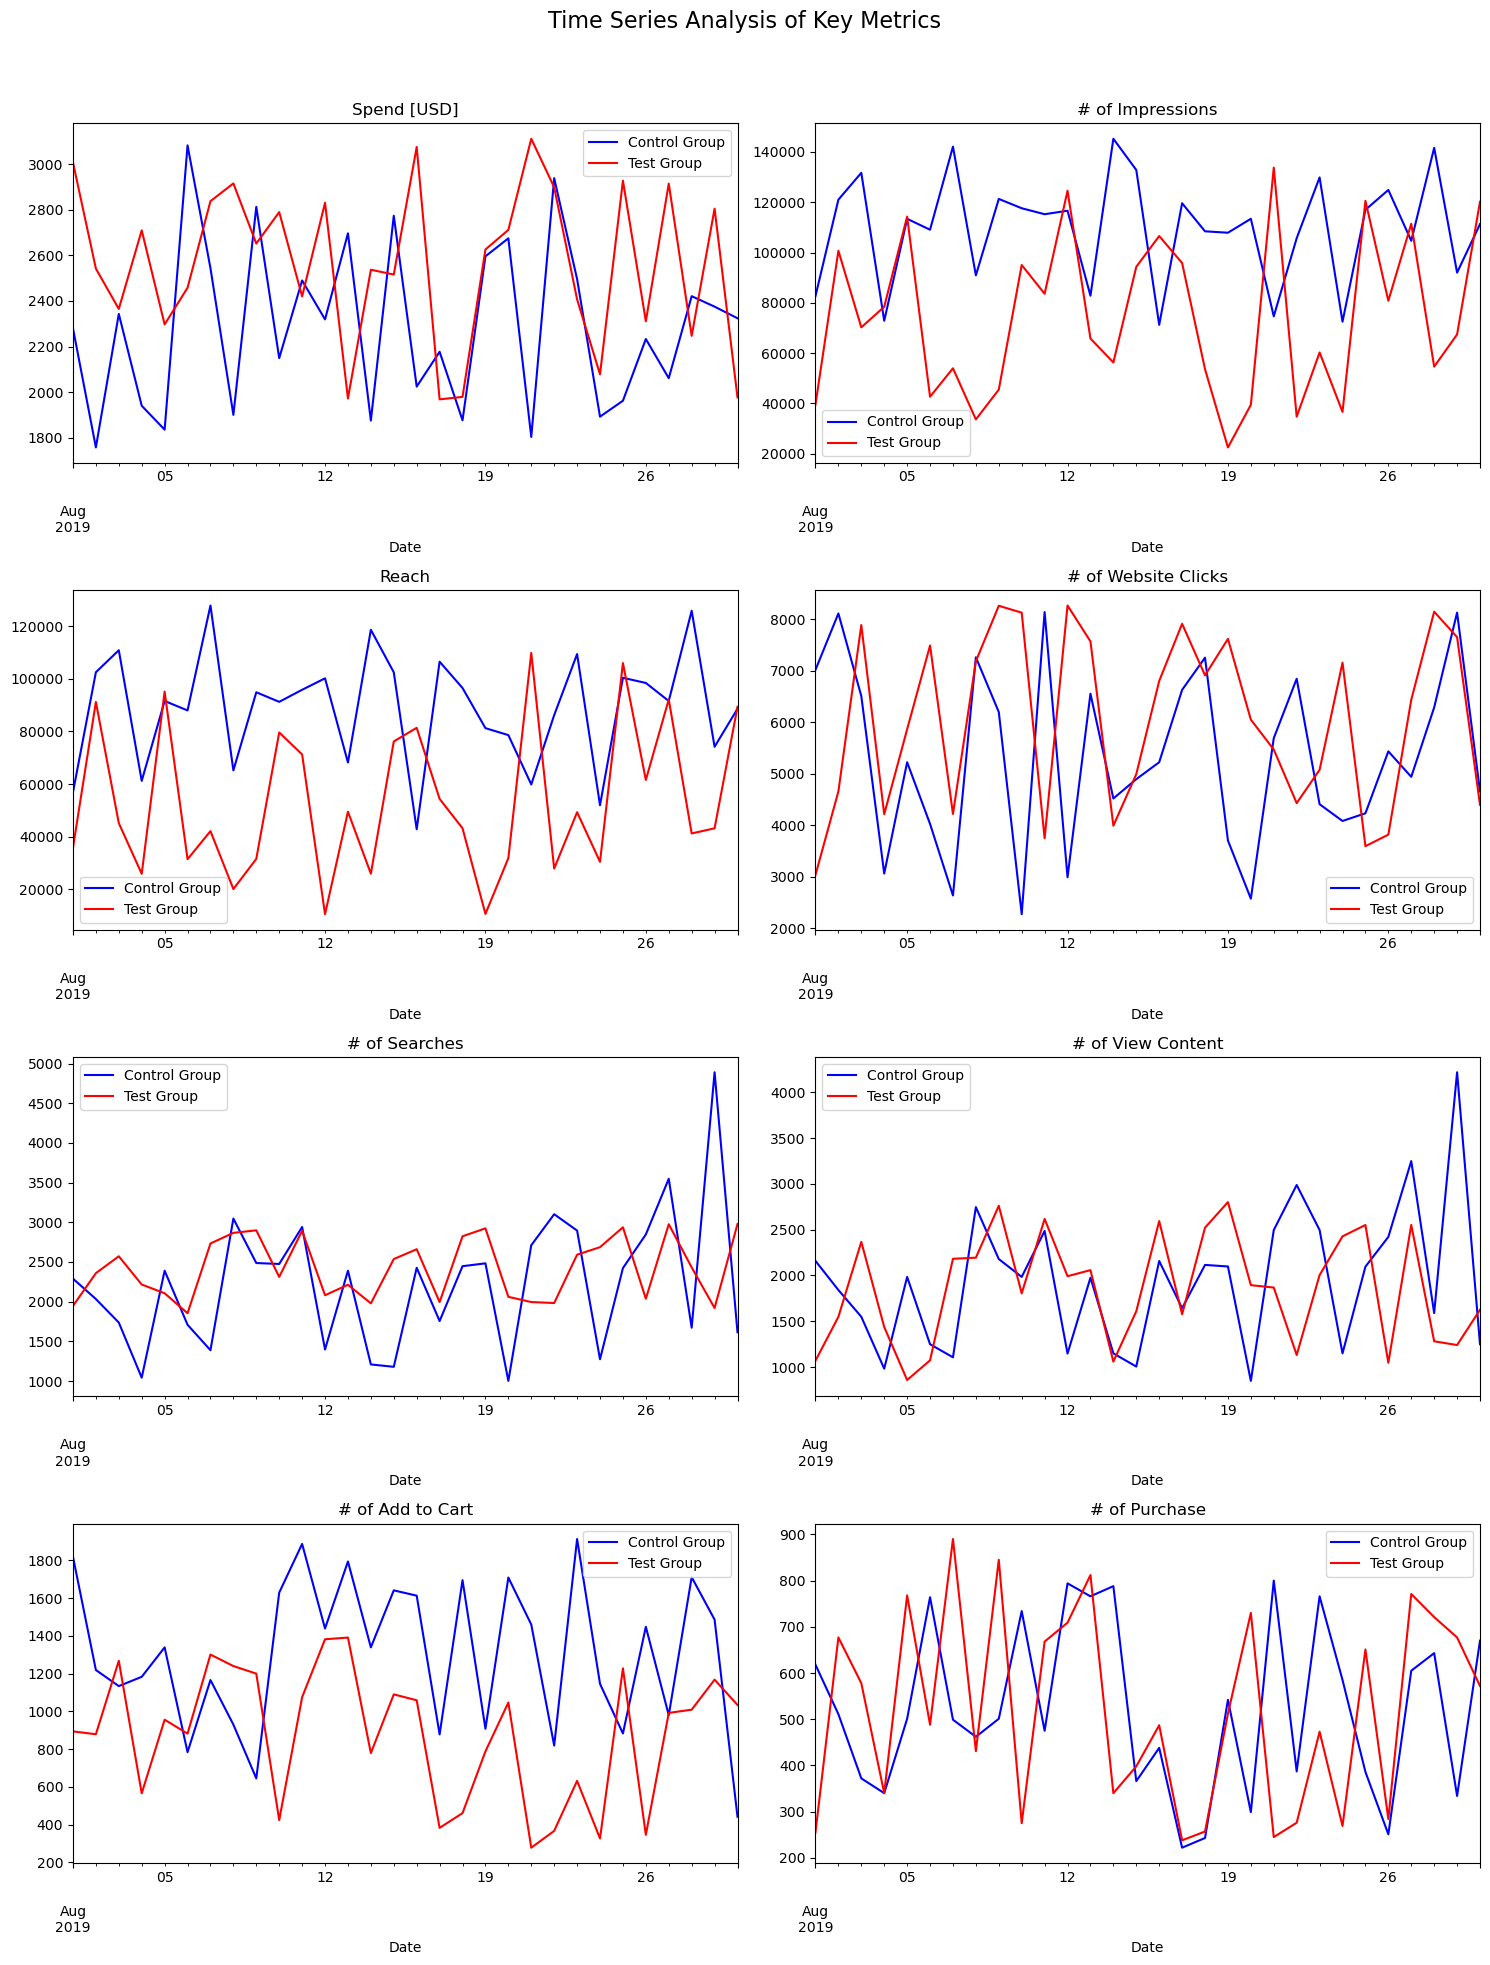

In [33]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = pd.concat(
    [control_group[numerical_features], test_group[numerical_features]]
).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Time Series
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle("Time Series Analysis of Key Metrics", fontsize=16)

for i, feature in enumerate(numerical_features):
    control_group.plot(
        x="Date", y=feature, ax=axes[i // 2, i % 2], label="Control Group", color="blue"
    )
    test_group.plot(
        x="Date", y=feature, ax=axes[i // 2, i % 2], label="Test Group", color="red"
    )
    axes[i // 2, i % 2].set_title(feature)
    axes[i // 2, i % 2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

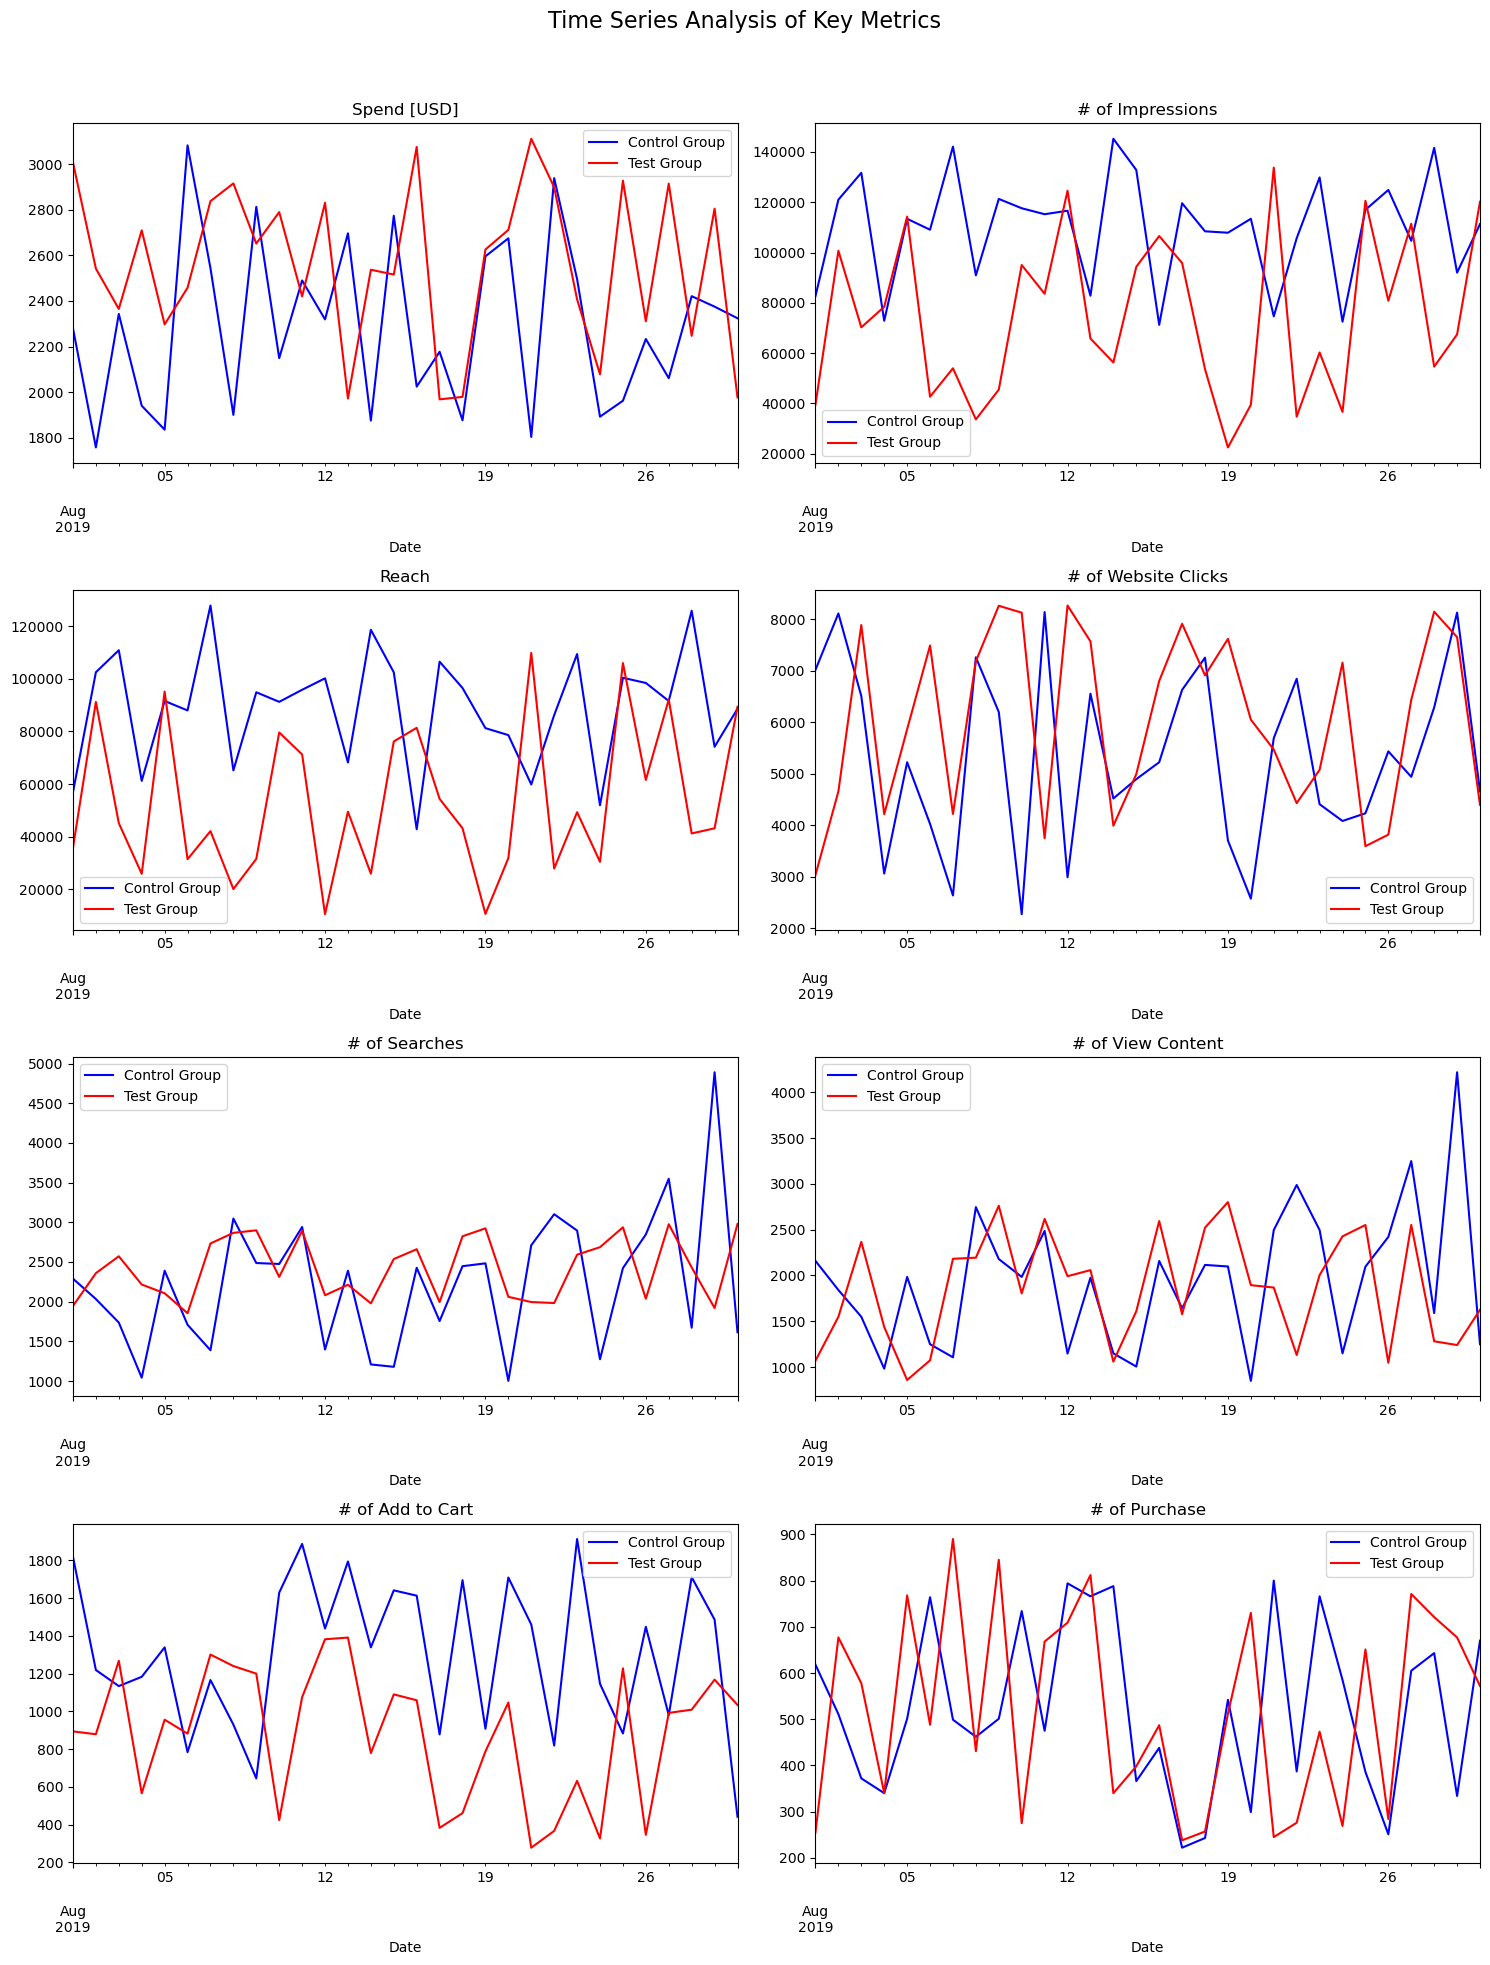

In [34]:
# Time Series
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle("Time Series Analysis of Key Metrics", fontsize=16)

for i, feature in enumerate(numerical_features):
    control_group.plot(
        x="Date", y=feature, ax=axes[i // 2, i % 2], label="Control Group", color="blue"
    )
    test_group.plot(
        x="Date", y=feature, ax=axes[i // 2, i % 2], label="Test Group", color="red"
    )
    axes[i // 2, i % 2].set_title(feature)
    axes[i // 2, i % 2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [35]:
control_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,2019-08-05,1835,113430.0,91579.0,5224.0,2390.0,1984.0,1339.0,501.0


In [37]:
#merge the data 
merge_group =pd.concat([control_group, test_group], ignore_index=True)
merge_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,2019-08-05,1835,113430.0,91579.0,5224.0,2390.0,1984.0,1339.0,501.0


In [40]:
merge_group.groupby("Campaign Name").agg({"# of Purchase":"mean","# of Impressions":"mean","# of Website Clicks":"mean","# of View Content":"mean","# of Add to Cart":"mean"})

,# of Purchase,# of Impressions,# of Website Clicks,# of View Content,# of Add to Cart
Campaign Name,,,,,
Control Campaign,522.066667,109688.766667,5317.566667,1945.133333,1301.300000
Test Campaign,521.233333,74584.800000,6032.333333,1858.000000,881.533333


Hypothesis Testing

Null: there's no singificant difference in the groups

Alternate: the test group performs better 

Normality Check

In [47]:
test_stat,pvalue = shapiro(merge_group.loc[merge_group["Campaign Name"]=="Control Campaign","# of Purchase"])
print("Test Stat = %.4f, p-value=%.4f" % (test_stat,pvalue))

if pvalue < 0.05:  
    print("The Test Campaign significantly outperforms the Control Campaign.")
else:
    print("There is no significant difference between the Test and Control Campaigns.")

Test Stat = 0.9421, p-value=0.1038
There is no significant difference between the Test and Control Campaigns.


In [51]:
test_stat,pvalue=shapiro(merge_group.loc[merge_group["Campaign Name"]== "Test Campaign","# of Purchase"])
print("Test Stat =%.4f, p-value=%.4f" % (test_stat,pvalue))

if pvalue < 0.05:  
    print("There is no normal distribution")
else:
    print("There is no significant difference between the Test and Control Campaigns.")

Test Stat =0.9182, p-value=0.0241
There is no normal distribution


Variance Homogenity

In [54]:
test_stat,pvalue=ttest_ind(merge_group.loc[merge_group["Campaign Name"]=="Control Campaign","# of Purchase"],
                        merge_group.loc[merge_group["Campaign Name"]=="Test Campaign","# of Purchase"],equal_var=True)

print("Test Stat =%.4f, p-value=%.4f" % (test_stat,pvalue))

if pvalue < 0.05:  
    print("The Test Campaign significantly outperforms the Control Campaign.")
else:
    print("There is no significant difference between the Test and Control Campaigns.")
    print("Null Hypothesis is not rejected")

Test Stat =0.0164, p-value=0.9870
There is no significant difference between the Test and Control Campaigns.
Null Hypothesis is not rejected


We can say that there are not much differences between the two groups.

Exploring cother KPIs

- Click-Through Rate (CTR) is the percentage of individuals viewing (impressions) a web page who view and then click on a specific advertisement that appears on that page. It measures how successful an ad has been in capturing users' attention. The higher the click-through rate, the more successful the ad has been in generating interest.

- Conversion Rate is the ratio of users who take a desired action (e.g., making a purchase) to the total number of users who clicked on the ad.

- CPC (cost per click) is a metric that determines how much advertisers pay for the ads they place on websites or social media, based on the number of clicks the ad receives. CPC is important for marketers to consider, since it measures the price is for a brand's paid advertising campaigns

- Return On Investment (ROI) provides an overview of the effectiveness of the advertising campaign.

In [59]:
merge_group['CTR'] = (merge_group['# of Website Clicks'] / merge_group['# of Impressions']) * 100
merge_group['Conversion Rate'] = (merge_group['# of Purchase'] / merge_group['# of Website Clicks']) * 100
merge_group['CPC'] = merge_group['Spend [USD]'] / merge_group['# of Website Clicks']
merge_group['ROI'] = ((merge_group['# of Purchase'] - merge_group['Spend [USD]']) / merge_group['Spend [USD]']) * 100

merge_group[['CTR', 'Conversion Rate','CPC','ROI']].head()

,CTR,Conversion Rate,CPC,ROI
0,8.483471,8.808438,0.324971,-72.894737
1,6.700264,6.300863,0.216646,-70.916335
2,4.941121,5.716042,0.360018,-84.122919
3,4.205659,11.092985,0.632953,-82.474227
4,4.605484,9.590352,0.351263,-72.697548


In [60]:
df_KPIs = merge_group.groupby("Campaign Name").agg({"CTR":"mean","Conversion Rate":"mean","CPC":"mean","ROI":"mean"})
df_KPIs

,CTR,Conversion Rate,CPC,ROI
Campaign Name,,,,
Control Campaign,5.079525,11.414308,0.490120,-76.659201
Test Campaign,10.242260,9.231182,0.468718,-79.342253


In [61]:
#ctr test
test_group['CTR'] = test_group['# of Website Clicks'] / test_group['# of Impressions']
control_group['CTR'] = control_group['# of Website Clicks'] / control_group['# of Impressions']

t_stat, p_value = stats.ttest_ind(control_group['CTR'], test_group['CTR'] )
print("p value : {}".format(p_value))

if p_value < 0.05:  
    print("The Test Campaign significantly outperforms the Control Campaign.")
    print("There is significant differences between Click through rate results for two campaigns")
else:
    print("There is no significant difference between the Test and Control Campaigns.")

p value : 0.0001802258266051824
The Test Campaign significantly outperforms the Control Campaign.
There is significant differences between Click through rate results for two campaigns


In [62]:
#conversion rate
test_group['Conversion Rate'] = test_group['# of Purchase'] / test_group['# of Website Clicks']
control_group['Conversion Rate'] = control_group['# of Purchase'] / control_group['# of Website Clicks']

t_stat, p_value = stats.ttest_ind(control_group['Conversion Rate'], test_group['Conversion Rate'] )
print("p value : {}".format(p_value))

if p_value < 0.05:  
    print("The Test Campaign significantly outperforms the Control Campaign.")
    print("There is significant differences between Click through rate results for two campaigns")
else:
    print("There is no significant difference between the Test and Control Campaigns.")

p value : 0.14363664487048286
There is no significant difference between the Test and Control Campaigns.


In [64]:
#cpc
test_group['CPC'] = test_group['Spend [USD]'] / test_group['# of Website Clicks']
control_group['CPC'] = control_group['Spend [USD]'] / control_group['# of Website Clicks']

t_stat, p_value = stats.ttest_ind(control_group['Conversion Rate'], test_group['Conversion Rate'] )
print("p value : {}".format(p_value))

if p_value < 0.05:  
    print("The Test Campaign significantly outperforms the Control Campaign.")
    print("There is significant differences between Click through rate results for two campaigns")
else:
    print("There is no significant difference between the Test and Control Campaigns.")

p value : 0.14363664487048286
There is no significant difference between the Test and Control Campaigns.


Insights:

- The Test Campaign significantly outperforms the Control Campaign in terms of CTR. This indicates that the Test Campaign's ads are more effective at engaging users and driving them to click on the ads.


- There is no statistically significant difference in the Conversion Rates between the two campaigns. The Conversion Rate in control group is slightly high that control groups are more prone to purchase after clicking the ads. 


- There is no significant difference in the CPC between the two campaigns. Both campaigns are similarly cost-effective in terms of ad spending per click. In test campaign, lower cost per click is observed.A low CPC in marketing means you can allow more clicks for your budget, which means more potential leads. It also ensures that you have a high return on investment (ROI) because you'll earn much more money back than you spent.